In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

587

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | castro
Processing Record 2 of Set 1 | hilo
Processing Record 3 of Set 1 | fort saint john
City not found. Skipping...
Processing Record 4 of Set 1 | labutta
City not found. Skipping...
Processing Record 5 of Set 1 | kavaratti
Processing Record 6 of Set 1 | oranjemund
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | tecpan
Processing Record 9 of Set 1 | airai
Processing Record 10 of Set 1 | iqaluit
Processing Record 11 of Set 1 | arraial do cabo
Processing Record 12 of Set 1 | saskylakh
Processing Record 13 of Set 1 | moron
Processing Record 14 of Set 1 | new norfolk
Processing Record 15 of Set 1 | georgetown
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | hobart
Processing Record 18 of Set 1 | jamestown
Processing Record 19 of Set 1 | sainte-suzanne
Processing Record 20 of Set 1 | severo-kurilsk
Processing Record 21 of Set 1 | mar del plata
Processing Re

Processing Record 30 of Set 4 | akdepe
Processing Record 31 of Set 4 | vestmanna
Processing Record 32 of Set 4 | portland
Processing Record 33 of Set 4 | tevaitoa
Processing Record 34 of Set 4 | lebu
Processing Record 35 of Set 4 | sobolevo
Processing Record 36 of Set 4 | sambava
Processing Record 37 of Set 4 | bezhetsk
Processing Record 38 of Set 4 | boa vista
Processing Record 39 of Set 4 | leningradskiy
Processing Record 40 of Set 4 | souillac
Processing Record 41 of Set 4 | bellevue
Processing Record 42 of Set 4 | dunedin
Processing Record 43 of Set 4 | carutapera
Processing Record 44 of Set 4 | honningsvag
Processing Record 45 of Set 4 | ola
Processing Record 46 of Set 4 | rocha
Processing Record 47 of Set 4 | tallahassee
Processing Record 48 of Set 4 | zaragoza
Processing Record 49 of Set 4 | carayao
Processing Record 50 of Set 4 | taggia
Processing Record 1 of Set 5 | mbala
Processing Record 2 of Set 5 | mama
Processing Record 3 of Set 5 | lompoc
Processing Record 4 of Set 5 | s

Processing Record 20 of Set 8 | green river
Processing Record 21 of Set 8 | yarmouth
Processing Record 22 of Set 8 | manokwari
Processing Record 23 of Set 8 | araouane
Processing Record 24 of Set 8 | taoudenni
Processing Record 25 of Set 8 | suzu
City not found. Skipping...
Processing Record 26 of Set 8 | flin flon
Processing Record 27 of Set 8 | kununurra
Processing Record 28 of Set 8 | jega
Processing Record 29 of Set 8 | krasnoarmeysk
Processing Record 30 of Set 8 | port macquarie
Processing Record 31 of Set 8 | aliwal north
Processing Record 32 of Set 8 | galiwinku
City not found. Skipping...
Processing Record 33 of Set 8 | luau
Processing Record 34 of Set 8 | louisbourg
City not found. Skipping...
Processing Record 35 of Set 8 | bealanana
Processing Record 36 of Set 8 | parati
Processing Record 37 of Set 8 | mongu
Processing Record 38 of Set 8 | ciras
City not found. Skipping...
Processing Record 39 of Set 8 | soyo
Processing Record 40 of Set 8 | mehriz
Processing Record 41 of Set

Processing Record 6 of Set 12 | ambon
Processing Record 7 of Set 12 | debre tabor
Processing Record 8 of Set 12 | karibib
Processing Record 9 of Set 12 | salinopolis
Processing Record 10 of Set 12 | camana
Processing Record 11 of Set 12 | broken hill
Processing Record 12 of Set 12 | pisco
Processing Record 13 of Set 12 | celestun
Processing Record 14 of Set 12 | yerbogachen
Processing Record 15 of Set 12 | whitehorse
Processing Record 16 of Set 12 | mahaplag
Processing Record 17 of Set 12 | gushikawa
Processing Record 18 of Set 12 | santa fe
Processing Record 19 of Set 12 | zemio
Processing Record 20 of Set 12 | cockburn town
Processing Record 21 of Set 12 | high rock
Processing Record 22 of Set 12 | charters towers
Processing Record 23 of Set 12 | jiazi
Processing Record 24 of Set 12 | baunatal
Processing Record 25 of Set 12 | sao joao do paraiso
Processing Record 26 of Set 12 | bilma
Processing Record 27 of Set 12 | palu
Processing Record 28 of Set 12 | trelew
Processing Record 29 of

In [10]:
len(city_data)

528

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Castro,-24.7911,-50.0119,66.92,35,0,6.29,BR,2021-07-22 16:40:07
1,Hilo,19.7297,-155.0900,73.13,90,90,5.75,US,2021-07-22 16:40:08
2,Kavaratti,10.5669,72.6420,82.51,81,100,22.19,IN,2021-07-22 16:40:09
3,Oranjemund,-28.5500,16.4333,57.00,56,7,22.82,NA,2021-07-22 16:40:09
4,Vaini,-21.2000,-175.2000,69.96,94,20,3.44,TO,2021-07-22 16:40:10
5,Tecpan,14.7623,-90.9947,65.16,52,74,7.63,GT,2021-07-22 16:40:10
6,Airai,-8.9266,125.4092,54.77,51,3,1.88,TL,2021-07-22 16:40:11
7,Iqaluit,63.7506,-68.5145,51.53,76,75,13.00,CA,2021-07-22 16:40:12
8,Arraial Do Cabo,-22.9661,-42.0278,75.06,60,20,9.22,BR,2021-07-22 16:40:12
9,Saskylakh,71.9167,114.0833,58.33,67,90,14.05,RU,2021-07-22 16:40:13


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Castro,BR,2021-07-22 16:40:07,-24.7911,-50.0119,66.92,35,0,6.29
1,Hilo,US,2021-07-22 16:40:08,19.7297,-155.0900,73.13,90,90,5.75
2,Kavaratti,IN,2021-07-22 16:40:09,10.5669,72.6420,82.51,81,100,22.19
3,Oranjemund,NA,2021-07-22 16:40:09,-28.5500,16.4333,57.00,56,7,22.82
4,Vaini,TO,2021-07-22 16:40:10,-21.2000,-175.2000,69.96,94,20,3.44
5,Tecpan,GT,2021-07-22 16:40:10,14.7623,-90.9947,65.16,52,74,7.63
6,Airai,TL,2021-07-22 16:40:11,-8.9266,125.4092,54.77,51,3,1.88
7,Iqaluit,CA,2021-07-22 16:40:12,63.7506,-68.5145,51.53,76,75,13.00
8,Arraial Do Cabo,BR,2021-07-22 16:40:12,-22.9661,-42.0278,75.06,60,20,9.22
9,Saskylakh,RU,2021-07-22 16:40:13,71.9167,114.0833,58.33,67,90,14.05


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

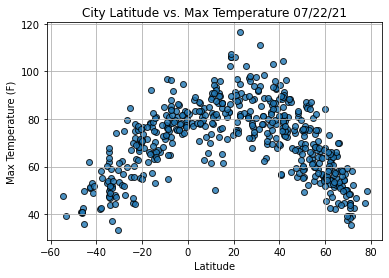

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

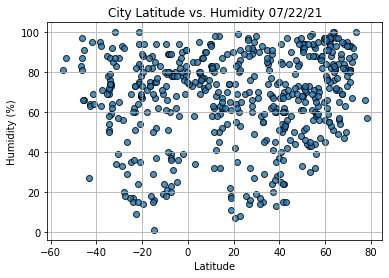

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

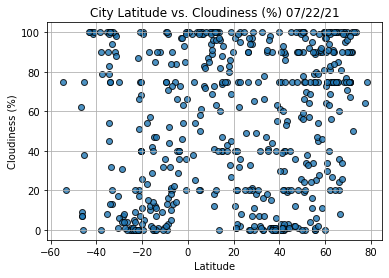

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

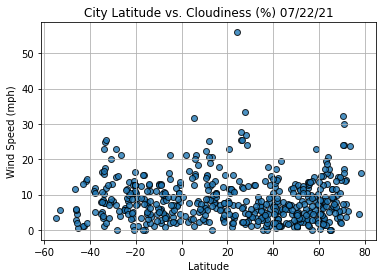

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [20]:
index13 = city_data_df.loc[13]
index13

City                      Rikitea
Country                        PF
Date          2021-07-22 16:40:15
Lat                      -23.1203
Lng                     -134.9692
Max Temp                    72.16
Humidity                       73
Cloudiness                      9
Wind Speed                  13.49
Name: 13, dtype: object

In [21]:
city_data_df['Lat'] >= 0

0      False
1       True
2       True
3      False
4      False
       ...  
523     True
524     True
525     True
526     True
527    False
Name: Lat, Length: 528, dtype: bool

In [22]:
city_data_df.loc[(city_data_df['Lat'] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Hilo,US,2021-07-22 16:40:08,19.7297,-155.0900,73.13,90,90,5.75
2,Kavaratti,IN,2021-07-22 16:40:09,10.5669,72.6420,82.51,81,100,22.19
5,Tecpan,GT,2021-07-22 16:40:10,14.7623,-90.9947,65.16,52,74,7.63
7,Iqaluit,CA,2021-07-22 16:40:12,63.7506,-68.5145,51.53,76,75,13.00
9,Saskylakh,RU,2021-07-22 16:40:13,71.9167,114.0833,58.33,67,90,14.05


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

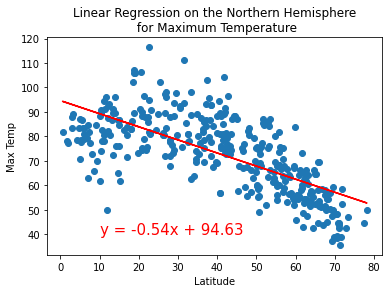

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for Maximum Temperature', 'Max Temp',(10,40))

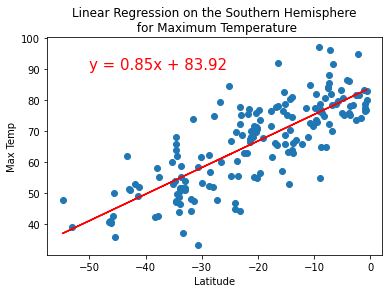

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for Maximum Temperature', 'Max Temp',(-50,90))

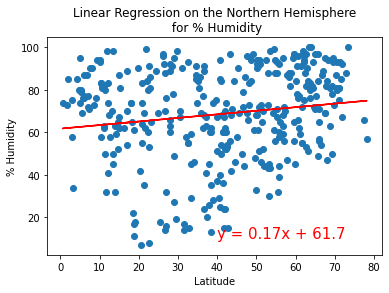

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for % Humidity', '% Humidity',(40,10))

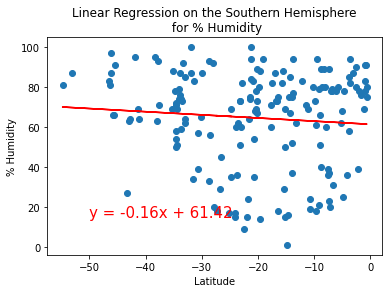

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for % Humidity', '% Humidity',(-50,15))

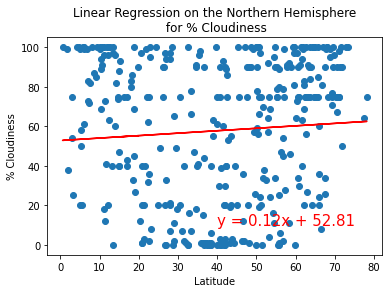

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for % Cloudiness', '% Cloudiness',(40,10))

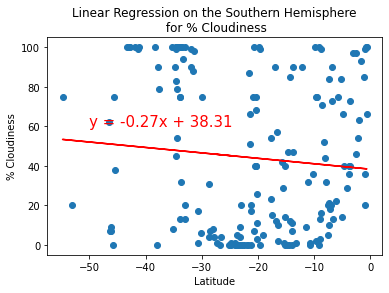

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for % Cloudiness', '% Cloudiness',(-50,60))

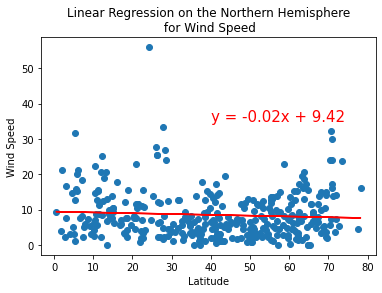

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for Wind Speed', 'Wind Speed',(40,35))

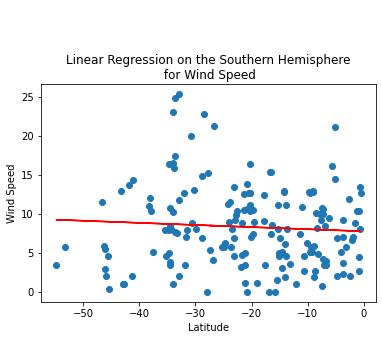

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for Wind Speed', 'Wind Speed',(-50,35))